In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
pd.options.display.max_rows = 100

In [2]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train



In [5]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
df.columns



Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'month', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
numericalX = df.select_dtypes(include=[np.number])
numericalX.head(10)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
5,4745,50549,61,2,73,0,7,292
6,5035,37405,63,8,99,3,4,287
7,4956,87197,63,35,45,0,3,247
8,5989,66839,154,33,24,0,1,739
9,17114,70961,85,19,8,0,2,408


In [7]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [8]:
####### Tuesdays Work##########

In [18]:
#x-y split


X = df.drop('total_claim_amount', axis=1)
y = df['total_claim_amount']



In [19]:
#n/c split

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)



/var/folders/yc/wft790592j143k8gw6c_18z40000gn/T/ipykernel_6081/96702193.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricalX = X.select_dtypes(np.object)


In [20]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
10646,west region,5480,no,basic,doctor,1/19/11,jan,employed,m,59311,...,8,38,0,9,corporate auto,corporate l3,offer1,web,four-door car,medsize
8298,west region,2980,no,extended,college,2/9/11,feb,medical leave,f,13535,...,7,53,1,1,personal auto,personal l3,offer2,agent,four-door car,small
3952,east,8750,no,premium,high school or below,1/5/11,jan,employed,f,25806,...,20,43,0,5,personal auto,personal l3,offer4,call center,four-door car,medsize


In [21]:
pt = PowerTransformer()


In [22]:
#standardizing the data

ct = ColumnTransformer([("pt", pt, list(numericalX.columns))],
                        remainder='drop',verbose_feature_names_out=True,verbose=True).fit(X_train)
X_train_ct = pd.DataFrame(ct.transform(X_train),columns=ct.get_feature_names_out())
X_test_ct = pd.DataFrame(ct.transform(X_test),columns=ct.get_feature_names_out())



X_train = pd.DataFrame(X_train_ct)
X_train_ct



[ColumnTransformer] ............ (1 of 1) Processing pt, total=   0.1s


,pt__customer_lifetime_value,pt__income,pt__monthly_premium_auto,pt__months_since_last_claim,pt__months_since_policy_inception,pt__number_of_open_complaints,pt__number_of_policies
0,-0.104487,0.402753,-0.839396,-0.588249,-0.249730,-0.513515,1.670127
1,-1.235864,-1.797816,-0.148691,-0.710561,0.265531,1.898104,-1.145964
2,0.612242,-1.044772,0.910985,0.573588,-0.072441,-0.513515,1.136908
3,0.061435,-0.699822,-0.371276,-0.253479,0.491245,-0.513515,1.464422
4,-0.390691,1.616741,1.022854,1.524440,0.491245,1.898104,-1.145964
...,...,...,...,...,...,...,...
7477,0.484444,-0.512684,0.837561,-1.288269,0.647853,-0.513515,0.521597
7478,1.304195,-0.916180,1.894314,-0.471823,1.010330,-0.513515,0.521597
7479,0.958544,-0.289746,0.674224,0.654663,-1.179721,1.898104,-0.057673
7480,0.341398,-1.905963,0.450308,0.230657,-0.828036,-0.513515,1.136908


In [14]:
#linear regression
X_train_const_ct = sm.add_constant(X_train_ct.to_numpy()) # adding a constant

model = sm.OLS(y_train, X_train_const_ct).fit()
predictions_train = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test_ct) # adding a constant
predictions_test = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     484.8
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:58:13   Log-Likelihood:                -51738.
No. Observations:                7482   AIC:                         1.035e+05
Df Residuals:                    7474   BIC:                         1.035e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.0175      2.819    154.309      0.0

In [15]:
#scikit learn
model=LinearRegression()    # model
model.fit(X_train_ct, y_train)   # model train

LinearRegression()

In [16]:
model.coef_

array([ -2.95995177, -35.85327773, 161.76504024,   1.35607006,
        -1.66538382,  -4.59630552,  -2.53382321])

In [25]:
model.intercept_

433.2473937449879

In [24]:
y_pred = pd.DataFrame(model.predict(X_test_ct),columns = ['total_claim_amount'] )      # model prediction
y_pred_train =  pd.DataFrame(model.predict(X_train_ct),columns = ['total_claim_amount'])

In [ ]:
#Model Validation
#Model Evaluation:
#        MSE.
 #       RMSE.
  #      MAE.
   #     R2.
    #    Adjusted R2.
     #Feature Importance.

In [26]:
print(mse(y_test,y_pred))
print(mse(y_train,y_pred_train))

60579.53968836596
58501.88380408256


In [33]:
rmse = np.sqrt(mse(y_test,y_pred))
print(rmse)

246.12911182622418


In [ ]:
print(mae(y_test,y_pred))


In [27]:
R2=r2_score(y_test,y_pred)
R2

0.32269949130879383

In [28]:
R2_test=model.score(X_test_ct,y_test)
R2_train=model.score(X_train_ct,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.31780539401067953

In [29]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,pt__monthly_premium_auto,161.765040
1,pt__income,35.853278
5,pt__number_of_open_complaints,4.596306
0,pt__customer_lifetime_value,2.959952
6,pt__number_of_policies,2.533823
4,pt__months_since_policy_inception,1.665384
3,pt__months_since_last_claim,1.356070


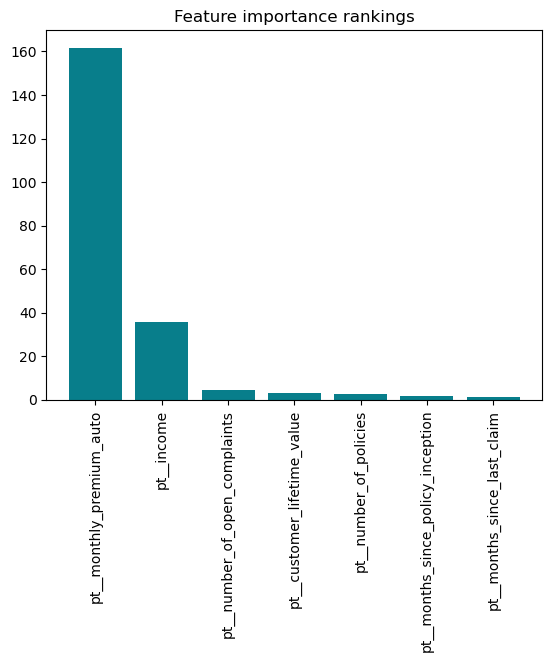

In [30]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()